In [2]:
import torch
import torch.utils.data as data
from config import LIDConfig
from Datasets.datasetLID import LIDDataset, collate_fn, collate_fn_mixup

hparams = LIDConfig()

## Validation Dataset
valid_set = LIDDataset(
    CSVPath = hparams.val_path,
    hparams = hparams,
    is_train=True
    )

## Validation Dataloader
valloader = data.DataLoader(
    valid_set, 
    batch_size=hparams.batch_size,
    shuffle=False, 
    num_workers=hparams.n_workers,
    collate_fn = collate_fn,
    )


################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################



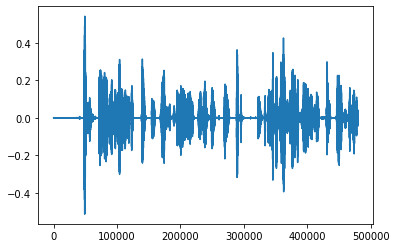

In [5]:
import matplotlib.pyplot as plt
item = valid_set[0]
x = item[0]
xhat = item[1] 

plt.plot(x.numpy().reshape(-1))
# plt.plot(xhat.numpy().reshape(-1))
plt.show()

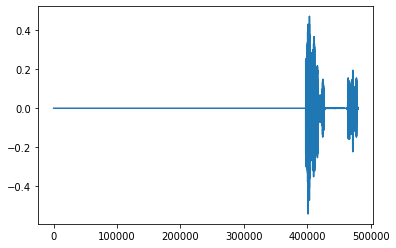

In [41]:
import random
import matplotlib.pyplot as plt
idx = int(random.random()*len(valid_set))

val_wav = valid_set[idx][0]
plt.plot(val_wav.numpy().reshape(-1))

In [25]:
import pandas as pd

data_path = "/root/LRE2017Dataset/LRE2017/lre17-val-set-less-than-60.csv"

df = pd.read_csv(data_path)
df.head()

,audiopath,class,seconds
0,/root/LRE2017Dataset/LRE2017/LDC2017E23_2017_N...,eng-usg,30
1,/root/LRE2017Dataset/LRE2017/LDC2017E23_2017_N...,zho-nan,10
2,/root/LRE2017Dataset/LRE2017/LDC2017E23_2017_N...,qsl-rus,3
3,/root/LRE2017Dataset/LRE2017/LDC2017E23_2017_N...,ara-ary,30
4,/root/LRE2017Dataset/LRE2017/LDC2017E23_2017_N...,ara-acm,30


In [20]:
import librosa

audio_lens = []
for index, row in df.iterrows():
    path = row["audiopath"]
    wav, _ = librosa.load(path, sr=8000) 
    audio_lens.append(len(wav))

print(max(audio_lens), min(audio_lens), sum(audio_lens)/len(audio_lens))

716960 24000 169068.4625044851


(array([1367.,  356.,   93.,  404.,  210.,  146.,  102.,   60.,   31.,
          18.]),
 array([ 24000.,  93296., 162592., 231888., 301184., 370480., 439776.,
        509072., 578368., 647664., 716960.]),
 <BarContainer object of 10 artists>)

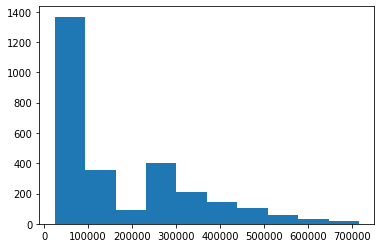

In [22]:
plt.hist(audio_lens)

(array([867., 500., 231., 125.,  60.,  33., 279., 125., 109., 101.,  78.,
         68.,  61.,  41.,  32.,  28.,  11.,  20.,  14.,   4.]),
 array([ 1.5   ,  3.6655,  5.831 ,  7.9965, 10.162 , 12.3275, 14.493 ,
        16.6585, 18.824 , 20.9895, 23.155 , 25.3205, 27.486 , 29.6515,
        31.817 , 33.9825, 36.148 , 38.3135, 40.479 , 42.6445, 44.81  ]),
 <BarContainer object of 20 artists>)

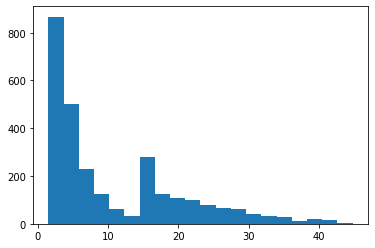

In [37]:
plt.hist([i/16000 for i in audio_lens], bins=20)